In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# READ IN TEMPERATURE DATA

temp_data_dir = f"D:/UAF/PHYS Capstone/Subsurftemperature/rwis_GWSA2.csv"
temp_data = pd.read_csv(temp_data_dir)
print(temp_data)

       station               obtime   longitude   latitude   subf
0        GWSA2  2011-11-04 03:22:00 -149.576263  61.311687  30.92
1        GWSA2  2011-11-04 04:22:00 -149.576263  61.311687  30.92
2        GWSA2  2011-11-04 05:22:00 -149.576263  61.311687  30.92
3        GWSA2  2011-11-04 07:22:00 -149.576263  61.311687  30.92
4        GWSA2  2011-11-04 08:22:00 -149.576263  61.311687  30.92
...        ...                  ...         ...        ...    ...
116148   GWSA2  2022-12-31 20:30:00 -149.576263  61.311687    NaN
116149   GWSA2  2022-12-31 21:10:00 -149.576263  61.311687    NaN
116150   GWSA2  2022-12-31 21:30:00 -149.576263  61.311687    NaN
116151   GWSA2  2022-12-31 22:10:00 -149.576263  61.311687    NaN
116152   GWSA2  2022-12-31 22:30:00 -149.576263  61.311687    NaN

[116153 rows x 5 columns]


In [3]:
# CREATE DATETIME OBJECTS OUT OF DATE COL AND SET AS INDEX

temp_date_date_format_execl = '%m/%d/%Y %I:%M:%S %p'
# Apparently excel automatically changes to this format:
temp_date_date_format = '%Y-%m-%d %H:%M:%S'

print(f"temp_data['obtime'] : {temp_data['obtime']}")
print(f"Format: {temp_data['obtime'][0]}")

temp_data['obtime'] = pd.to_datetime(temp_data['obtime'], format=temp_date_date_format)
temp_data.set_index('obtime', inplace=True)
print(f'Index Type: {temp_data.index[0]}')
print(temp_data)

temp_data['obtime'] : 0         2011-11-04 03:22:00
1         2011-11-04 04:22:00
2         2011-11-04 05:22:00
3         2011-11-04 07:22:00
4         2011-11-04 08:22:00
                 ...         
116148    2022-12-31 20:30:00
116149    2022-12-31 21:10:00
116150    2022-12-31 21:30:00
116151    2022-12-31 22:10:00
116152    2022-12-31 22:30:00
Name: obtime, Length: 116153, dtype: object
Format: 2011-11-04 03:22:00
Index Type: 2011-11-04 03:22:00
                    station   longitude   latitude   subf
obtime                                                   
2011-11-04 03:22:00   GWSA2 -149.576263  61.311687  30.92
2011-11-04 04:22:00   GWSA2 -149.576263  61.311687  30.92
2011-11-04 05:22:00   GWSA2 -149.576263  61.311687  30.92
2011-11-04 07:22:00   GWSA2 -149.576263  61.311687  30.92
2011-11-04 08:22:00   GWSA2 -149.576263  61.311687  30.92
...                     ...         ...        ...    ...
2022-12-31 20:30:00   GWSA2 -149.576263  61.311687    NaN
2022-12-31 21:10:00   

In [4]:
# CHECK NAN COUNT

num_rows = len(temp_data.index)
print(f"Entries: {num_rows}")
temp_data_dropped = temp_data.dropna()
num_rows_dropped = len(temp_data_dropped.index)
print(f"Entries after the drop: {num_rows_dropped}")

print(temp_data_dropped)

Entries: 116153
Entries after the drop: 55265
                    station   longitude   latitude   subf
obtime                                                   
2011-11-04 03:22:00   GWSA2 -149.576263  61.311687  30.92
2011-11-04 04:22:00   GWSA2 -149.576263  61.311687  30.92
2011-11-04 05:22:00   GWSA2 -149.576263  61.311687  30.92
2011-11-04 07:22:00   GWSA2 -149.576263  61.311687  30.92
2011-11-04 08:22:00   GWSA2 -149.576263  61.311687  30.92
...                     ...         ...        ...    ...
2019-09-09 06:20:00   GWSA2 -149.576263  61.311687  58.28
2019-09-09 07:20:00   GWSA2 -149.576263  61.311687  58.28
2019-09-09 08:20:00   GWSA2 -149.576263  61.311687  58.28
2019-09-09 09:20:00   GWSA2 -149.576263  61.311687  58.10
2019-09-09 10:20:00   GWSA2 -149.576263  61.311687  58.10

[55265 rows x 4 columns]


In [5]:
# RESAMPLE TEMPERATURE DATA

temp_data = temp_data.resample('D').mean()
print(temp_data)
temp_data.to_pickle("D:/UAF/PHYS Capstone/Subsurftemperature/rwis_GWSA2_resampled.pickle")

             longitude   latitude       subf
obtime                                      
2011-11-04 -149.576263  61.311687  31.033684
2011-11-05 -149.576263  61.311687  31.302500
2011-11-06 -149.576263  61.311687  30.690909
2011-11-07 -149.576263  61.311687  30.779130
2011-11-08 -149.576263  61.311687  30.530000
...                ...        ...        ...
2022-12-27 -149.576263  61.311687        NaN
2022-12-28 -149.576263  61.311687        NaN
2022-12-29 -149.576263  61.311687        NaN
2022-12-30 -149.576263  61.311687        NaN
2022-12-31 -149.576263  61.311687        NaN

[4076 rows x 3 columns]


             longitude   latitude       subf
obtime                                      
2011-11-04 -149.576263  61.311687  31.033684
2011-11-05 -149.576263  61.311687  31.302500
2011-11-06 -149.576263  61.311687  30.690909
2011-11-07 -149.576263  61.311687  30.779130
2011-11-08 -149.576263  61.311687  30.530000
...                ...        ...        ...
2022-12-27 -149.576263  61.311687        NaN
2022-12-28 -149.576263  61.311687        NaN
2022-12-29 -149.576263  61.311687        NaN
2022-12-30 -149.576263  61.311687        NaN
2022-12-31 -149.576263  61.311687        NaN

[4076 rows x 3 columns]
         obtime   longitude   latitude       subf
0    2011-11-04 -149.576263  61.311687  31.033684
1    2011-11-05 -149.576263  61.311687  31.302500
2    2011-11-06 -149.576263  61.311687  30.690909
3    2011-11-07 -149.576263  61.311687  30.779130
4    2011-11-08 -149.576263  61.311687  30.530000
...         ...         ...        ...        ...
4071 2022-12-27 -149.576263  61.311687  

ValueError: operands could not be broadcast together with shapes (15,) (4076,) 

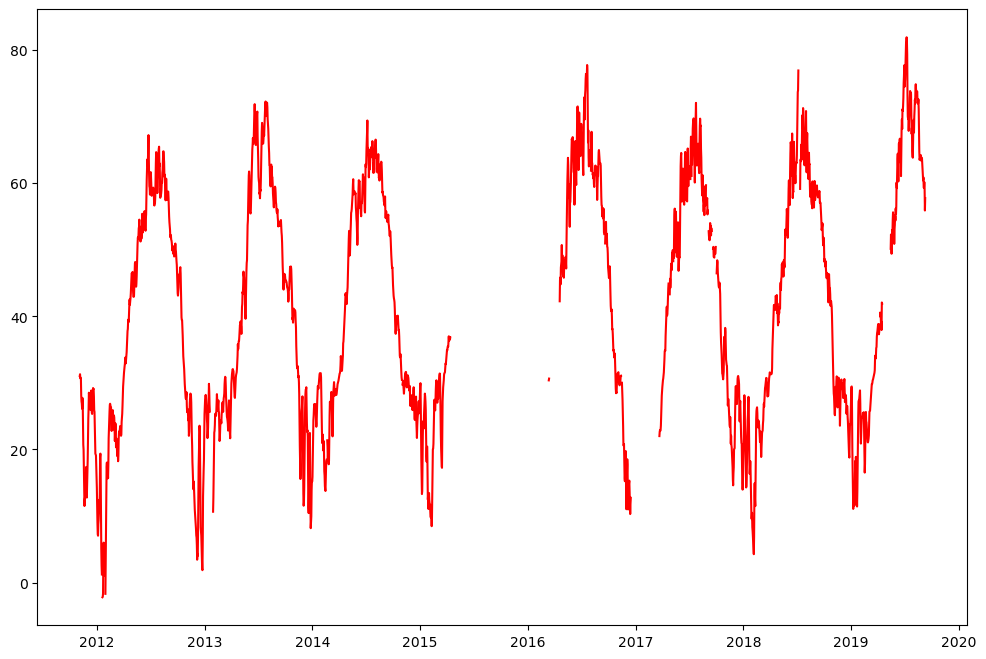

In [6]:
# PLOT TEMPERATURE DATA

fig, ax1 = plt.subplots(figsize=[12,8])
print(temp_data)
temp_data_reset = temp_data.reset_index()
print(temp_data_reset)
print(temp_data_reset.columns)
ax1.plot(temp_data_reset['obtime'], temp_data_reset['subf'], color='r')
ax1.fill_between(np.arange(2008,2023,1), temp_data_reset.subf, 0, color='r', alpha=0.4)